## Linear Regression - OLS Polynomial Regression & Stochastic Gradient Descent 


There are four tasks for this recitation:
- Perform Polynomial Regression using sklearn's OLS method
- Plot degree vs. error to choose optimal degree for a fixed set datasize
- Plot learning curves to investigate how the size of training data influeces the model performance for various polynomial models
- Using the optimal degree obtained from OLS Polynomial Regression, perform Linear (Polynomial) Regression using sklearn's SGDRegressor

You will use the **Red wine** quality dataset from the following link.

### Dataset

URL: https://archive.ics.uci.edu/ml/datasets/wine+quality

The dataset is related to the **Red** variants of the Portuguese "Vinho Verde" wine. It provides the physicochemical (inputs) and sensory (the output) variables are available.

The dataset consists of characteristics of white wine (e.g., alcohol content, density, amount of citric acid, pH, etc) with target variable "quality" representing rating of wine.


Given the characteristics of a new, unlabeled wine, the regression task is to predict its "quality".

Input variables (based on physicochemical tests):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Output variable (based on sensory data): 
- quality 


In [1]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Load Data

First load the data and explore the feature names, target names, etc.

In [2]:
# Load data
df = pd.read_csv('winequality-red.csv')

# Exploratory Data Analysis

Perform EDA and determine the following:
- Are the input variables collinear?
- Do you need to drop any input variable column? 

Drop the redundant columns if need be. However, if dropping a column doesn't achieve the best accuracy, then don't drop it.

In [3]:
df.info()
df.corr()['quality'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

# Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

Create a data matrix (X) that contains all features and a 1D target vector (y) containing the target.



In [4]:
X = df.drop(columns=['quality'])
y = df['quality']
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


# Scale The Features

We should ensure that all features have a similar scale. Otherwise optimization algorithms (e.g., Gradient Descent based algorithms) will take much longer time to converge.

Also, regularization techniques are sensitive to the scale of data. Thus, you must scale the features before applying regularization.

In [5]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Create Train and Test Dataset

Use the **"random_state"** attribute of the "train_test_split" function to ensure the reproducability of your results.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color=blue>Polynomial Regression Using the OLS Method</font>



## Choose the Optimal Degree (Model Complexity) of the Polynomial Regression

Vary the degree of the polynomial (degree 1, 2 & 3) and train the sklearn's Linear Regression model (OLS) using the training data. Then, compute the mean squared error (mse) for the test data using the models with varying degree.

Finally, plot the **root mean square error (rmse)** values against the varying degree. From this plot find the optimal degree (that gives the smallest rmse).


## <font color=red> Note for Assignment 2:

For the assignment you will have to use cross-validation to get an estimate of a model’s generalization performance. 

You will write a function to plot the training and validation root mean square error (rmse) values of the data matrix X for various polynomial degree starting from 1 up to the value set by max polynomial degree. It takes the data matrix X (usually the training data matrix) and the max polynomial degree; and for each polynomial degree it will augment the data matrix, then use k-fold cross-validation to compute the average mse for both the training and the validation fold. For training the model (using the “fit” method) it will use the model parameters from the function argument. Finally, the function will plot the root-mean-square error (rmse) values for the training and validation folds for each degree of the data matrix starting from 1 up to the max polynomial degree.


## Model's Complexity: Overfitting or Underfitting
If a model performs well on the training data but generalizes poorly (on the validation data) according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.


#### Report optimal degree

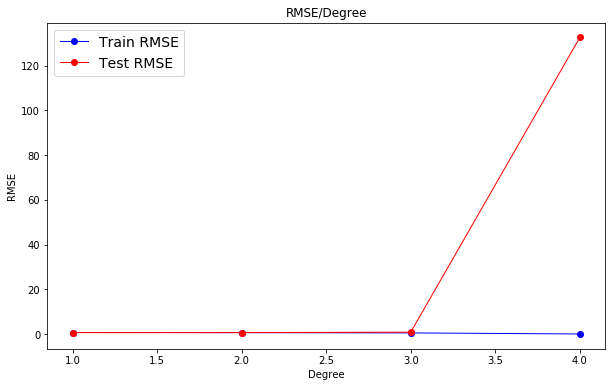

Optimal Degree:  2


In [7]:
# RMSE vs. Degree Curve
degree = [1,2,3,4]
mse_train, mse_test = [], []
for i in degree:
    model = make_pipeline(PolynomialFeatures(i, include_bias=False), StandardScaler(), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
plt.figure(figsize=(10, 6))
plt.plot(degree, np.sqrt(mse_train), "bo-", alpha=1.0, linewidth=1.0, label="Train RMSE")
plt.plot(degree, np.sqrt(mse_test), "ro-", alpha=1.0, linewidth=1.0, label="Test RMSE")
plt.legend(loc="best", fontsize=14)
plt.title("RMSE/Degree")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.show()
    
rmse_test = np.sqrt(mse_test)
j = 0
min_rmse = rmse_test[j]
optimal_degree = 1

for i in degree:
    if rmse_test[j] < min_rmse:
        min_rmse = rmse_test[j]
        optimal_degree = i
    j += 1


print("Optimal Degree: ", optimal_degree)

## Determine Model Complexity using Learning Curve

Determine your polynomial regression model's complexity (whether it's overfitting or underfitting) by creating learning curves by varying the degree of polynomial. 

Use skleatn's function for plotting the learning curves.


You will generate two set of learning curves.
- Linear Model
- 4th Degree Polynomial Model

Your goal is to investigate whether your two models are overfitting or underfitting. Under the "Observation" block clearly state your conclusion and justification.

## Learning Curve: Linear Model

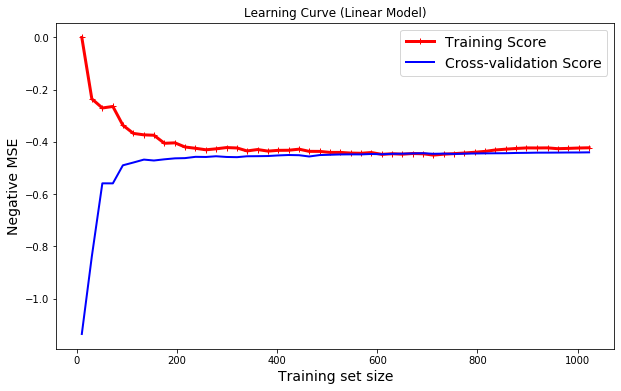

In [8]:
# Learning Curve: Linear Model
#model_lin = make_pipeline(PolynomialFeatures(1, include_bias=False), StandardScaler(), LinearRegression())
#mse_train_lin, mse_test_lin = [], []
#for i in range(1, len(X_train)):
#    model_lin.fit(X_train[:i], y_train[:i])
#    y_train_pred_lin = model_lin.predict(X_train[:i])
#    y_test_pred_lin = model_lin.predict(X_test)
#    mse_train_lin.append(mean_squared_error(y_train[:i], y_train_pred_lin))
#    mse_test_lin.append(mean_squared_error(y_test, y_test_pred_lin))

#plt.figure(figsize=(10, 6))
#plt.plot(np.sqrt(mse_train_lin), "b-", alpha=1.0, linewidth=1.6, label="Linear Train RMSE")
#plt.plot(np.sqrt(mse_test_lin), "r-", alpha=1.0, linewidth=1.6, label="Linear Test RMSE")
#plt.legend(loc="best", fontsize=14)
#plt.title("Linear Learning Curve")
#plt.xlabel("Training Size")
#plt.ylabel("RMSE")
#plt.show()

train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X_train, y_train, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.01, 1.0, 50),
                                                        n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_mean, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("Negative MSE", fontsize=14) 
plt.title("Learning Curve (Linear Model)")
plt.show()

## Observation: Linear Model Learning Curve

#### Conclusion: The linear model is ideal.

#### Justification: Both train and test data have very low errors and there is no gap between train and test error.

## Learning Curve: Polynomial Model (4th degree)

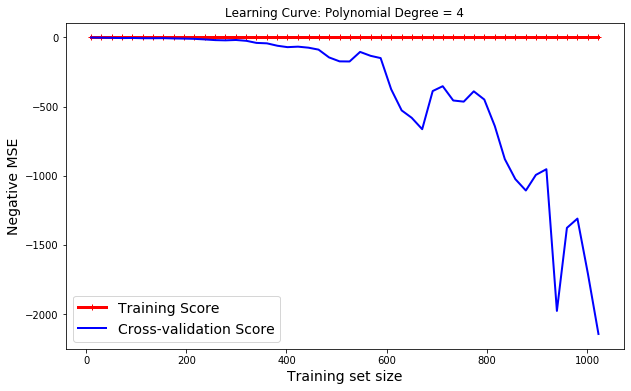

In [9]:
# Learning Curve: Polynomial (4th Degree) Model
#model_poly = make_pipeline(PolynomialFeatures(4, include_bias=False), StandardScaler(), LinearRegression())
#mse_train_poly, mse_test_poly = [], []
#for i in range(1, len(X_train)):
#    model_poly.fit(X_train[:i], y_train[:i])
#    y_train_pred_poly = model_poly.predict(X_train[:i])
#    y_test_pred_poly = model_poly.predict(X_test)
#    mse_train_poly.append(mean_squared_error(y_train[:i], y_train_pred_poly))
#    mse_test_poly.append(mean_squared_error(y_test, y_test_pred_poly))

#plt.figure(figsize=(10, 6))
#plt.plot(np.sqrt(mse_train_poly), "b-", alpha=1.0, linewidth=1.6, label="Polynomial Train RMSE")
#plt.plot(np.sqrt(mse_test_poly), "r-", alpha=1.0, linewidth=1.6, label="Polynomial Test RMSE")
#plt.legend(loc="best", fontsize=14)
#plt.title("Polynomial(4) Learning Curve")
#plt.xlabel("Training Size")
#plt.ylabel("RMSE")
#plt.show()

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

scaler = StandardScaler().fit(X_train_poly)
X_train_poly_standardized = scaler.transform(X_train_poly)

train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X_train_poly_standardized, y_train, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

train_mean_poly = np.mean(train_scores, axis=1)
train_std_poly = np.std(train_scores, axis=1)

val_mean_poly = np.mean(val_scores, axis=1)
val_std_poly = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean_poly, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_mean_poly, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("Negative MSE", fontsize=14) 
plt.title("Learning Curve: Polynomial Degree = %d" % 4)
plt.show()

## Observation: Polynomial Model (4th degree) Learning Curve

##### Conclusion: The degree 4 polynomial model is overfitting.



##### Justification: There is a huge gap between train and test error and cross validation MSE is decreasing. The model memorized the noise in the training data so the testing error is increasing.

# <font color=blue>Stochastic Gradient Descent (SGD)


Using the **optimal degree** (obtained from the RMSE vs Degree curve) perform Gradient Descent based linear regression by using sklearn's SGDRegressor. You should use **regularized** SGDRegressor.

First, you will select the best model via hyperparameter tuning. Use sklearn's GridSearchCV.

Find the best combination of the following hyperparameters. You may add other parameters in this list if you find it reasonable.

- alpha
- learning_rate ("constant", "optimal")
- eta0
- l1_ratio
- max_iter
- eta0

The GridSearchCV takes an argument to define the scoring metric (performance measure). 

See the list of possible scoring functions:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For regression, you may use "neg_mean_squared_error" or "explained_variance" scoring function. 


In [10]:
# Augment the feature space if needed based on the optimal degree
poly_features = PolynomialFeatures(degree=optimal_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
print("Augmented feature number: ", X_train_poly.shape[1])

Augmented feature number:  77


## Hyperparameter Tuning for SGD Regressor

You should tune the following hyperparameters. I have suggested some values and range, but you free to explore. 

- alpha: 0.1, 0.01, 0.001
- learning_rate: "constant", "optimal", "invscaling"
- max_iter': 100, 400, 1000, 5000, 10000, 20000
- eta0: 0.01, 0.001
- loss: 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'

#### Report the best score (negative mean squared error) & optimal hyperparameter values.

In [11]:
%%time
warnings.filterwarnings('ignore')
param_grid = {'alpha':[0.1, 0.01, 0.001], 'learning_rate':["constant", "optimal", "invscaling"],
              'max_iter':[100, 400, 1000, 5000, 10000, 20000], 'eta0':[0.01, 0.001],
              'loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
sgd = SGDRegressor()

sgd_cv = GridSearchCV(sgd, param_grid, scoring='neg_mean_squared_error', cv=10, verbose=2, n_jobs=-1)
sgd_cv.fit(X_train_poly, y_train)
params_optimal_sgd = sgd_cv.best_params_
print("Best Score (negative mean squared error): %f" % sgd_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1797 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 2829 tasks      | elapsed:   18.5s


Best Score (negative mean squared error): -0.457895
Optimal Hyperparameter Values:  {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'max_iter': 5000}
CPU times: user 4.35 s, sys: 183 ms, total: 4.53 s
Wall time: 39.4 s


[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   39.3s finished


## Select The Best Model for the SGD Regressor

Using the optimal hyperparameter values, create the best model.
Then, fit the model.


Report the following two evaluation metrics.

- Mean Squared Error (MSE)
- Coefficient of Determination or $R^2$/$r^2$


In [12]:
# SGD Regression using the best model
sgd_poly_optimal = SGDRegressor(**params_optimal_sgd)
sgd_poly_optimal.fit(X_train_poly, y_train)

print("\n----------------------------- Model Evaluation -----------------------------")

# Make prediction on the training data
y_train_pred_sgd = sgd_poly_optimal.predict(X_train_poly)


print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_pred_sgd))


print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" %r2_score(y_train, y_train_pred_sgd))


----------------------------- Model Evaluation -----------------------------
Mean squared error: 0.40
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.38


## Evaluate Model Performance Using Test Data

In [13]:
X_test_poly = poly_features.fit_transform(X_test)
sgd_poly_optimal.fit(X_test_poly, y_test)




# Make prediction using the test data
y_test_pred_sgd = sgd_poly_optimal.predict(X_test_poly)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred_sgd))


print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_pred_sgd))

Mean squared error: 0.43
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.34
